In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importamos los datos:
path = "./Data/outputPV.txt"
df = pd.read_csv(path, header=None)
df.columns = ["V_pv","I_pv"]
df.insert(2,"P_pv",df["V_pv"]*df["I_pv"])


In [2]:
# Puntos de maxima potencia
def PMM():
    df_mask = df['P_pv']==df['P_pv'].max()
    filtered_df = df[df_mask]
    return filtered_df

pmm = PMM()
print(pmm)

          V_pv    I_pv        P_pv
149755  149.76  25.944  3885.37344


In [101]:
# Funcion para obtener el indice del PMM
def index_pmm():
    pmm = PMM()
    index = pmm.index.values[0]
    return index

In [103]:
# funcion para calcular el modelo de la curva ajustada
def model(x,y,degree):
    model = np.poly1d(np.polyfit(x, y, degree))
    return model

In [107]:
# Funcion para calcular el R-cuadrado ajustado
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

In [108]:
i = index_pmm()

rangos = [10, 20, 30, 40, 50]
grados = [3,5,7]
model1 = []
model2 = []
r2_1 = []
r2_2 = []

In [109]:
for g in grados:
    for r in rangos:   
        df1 = df.iloc[:i+r]
        df2 = df.iloc[i-r:]
        
        v1 = df1.V_pv
        p1 = df1.P_pv
        v2 = df2.V_pv
        p2 = df2.P_pv
           
        m1 = model(v1,p1,g)
        m2 = model(v2,p2,g)
            
        model1.append(m1)
        model2.append(m2)
        
        ad1 = adjR(v1, p1, g)
        ad2 = adjR(v2, p2, g)
        
        r2_1.append(ad1)
        r2_2.append(ad2)

In [156]:
def p1_1(x):
    return -0.0003277*x**3 + 0.05629*x**2 + 25.34*x + 25.09
def p1_2(x):
    return -0.0003279*x**3 + 0.05635*x**2 + 25.34*x + 25.11
def p1_3(x):
    return -0.0003282*x**3 + 0.0564*x**2 + 25.33*x + 25.14
def p1_4(x):
    return -0.0003285*x**3 + 0.05645*x**2 + 25.33*x + 25.16
def p1_5(x):
    return -0.0003287*x**3 + 0.0565*x**2 + 25.33*x + 25.19
def p1_6(x):
    return -9.224e-08*x**5 + 2.863e-05*x**4 - 0.003155*x**3 + 0.1441*x**2 + 25.48*x + 10.2
def p1_7(x):
    return -9.23e-08*x**5 + 2.865e-05*x**4 - 0.003158*x**3 + 0.144*x**2 + 25.48*x + 10.21
def p1_8(x):
    return -9.237e-08*x**5 + 2.867e-05*x**4 - 0.003161*x**3 + 0.1444*x**2 + 25.48*x + 10.22
def p1_9(x):
    return -9.243e-08*x**5 + 2.869e-05*x**4 - 0.003163*x**3 + 0.1445*x**2 + 25.48*x + 10.23
def p1_10(x):
    return -9.25e-08*x**5 + 2.871e-05*x**4 - 0.003166 *x**3 + 0.1446*x**2 + 25.47*x + 10.24
def p1_11(x):
    return -1.481e-11*x**7 + 6.51e-09*x**6 - 1.139e-06*x**5 + 0.0001002*x**4 - 0.004614*x**3  + 0.1031*x**2 + 27.05*x + 2.176
def p1_12(x):
    return -1.482e-11*x**7 + 6.514e-09*x**6- 1.14e-06*x**5 + 0.0001002*x**4 - 0.004618*x**3  + 0.1032*x**2 + 27.05*x + 2.178
def p1_13(x):
    return -1.483e-11*x**7 + 6.518e-09*x**6 - 1.14e-06*x**5 + 0.0001003*x**4 - 0.004621*x**3 + 0.1033*x**2 + 27.05 *x + 2.18
def p1_14(x):
    return -1.484e-11*x**7 + 6.522e-09*x**6 - 1.141e-06*x**5 + 0.0001004*x**4 - 0.004625*x**3  + 0.1034*x**2 + 27.05*x + 2.182
def p1_15(x):
    return -1.484e-11*x**7 + 6.526e-09*x**6 - 1.142e-06*x**5 + 0.0001005*x**4 - 0.004628*x**3  + 0.1035*x**2 + 27.05*x + 2.185


In [151]:
pmm = 3885.37344
vmm = 149.76

def error(a):
    return round(((abs(a - pmm))/pmm)*100,2)

In [168]:
print(error(p1_1(vmm)))
print(error(p1_2(vmm)))
print(error(p1_3(vmm)))
print(error(p1_4(vmm)))
print(error(p1_5(vmm)))
print(error(p1_6(vmm)))
print(error(p1_7(vmm)))
print(error(p1_8(vmm)))
print(error(p1_9(vmm)))
print(error(p1_10(vmm)))
print(error(p1_11(vmm)))
print(error(p1_12(vmm)))
print(error(p1_13(vmm)))
print(error(p1_14(vmm)))
print(error(p1_15(vmm)))

2.48
2.5
2.46
2.47
2.48
0.73
0.55
0.65
0.68
0.56
0.09
1.41
0.41
0.2
0.52


In [180]:
p1_11(vmm)

3888.9130015654932

In [170]:
def p2_1(x):
    return -0.005694*x**3 - 0.04569*x**2 + 412.8*x - 3.782e+04
def p2_2(x):
    return -0.005703*x**3 - 0.04091*x**2 + 411.9 *x - 3.777e+04
def p2_3(x):
    return -0.005712*x**3 - 0.03614*x**2 + 411.1 *x - 3.772e+04
def p2_4(x):
    return -0.005721*x**3 - 0.03136 *x**2 + 410.2 *x - 3.767e+04
def p2_5(x):
    return -0.00573*x**3 - 0.02659 *x**2 + 409.4 *x - 3.762e+04
def p2_6(x):
    return -4.23e-06*x**5 + 0.004113*x**4 - 1.586 *x**3 + 300.3 *x**2 - 2.787e+04 *x + 1.018e+06
def p2_7(x):
    return -4.226e-06*x**5 + 0.004109*x**4 - 1.585 *x**3 + 300.1 *x**2 - 2.785e+04 *x + 1.018e+06
def p2_8(x):
    return -4.222e-06*x**5 + 0.004105*x**4 - 1.583 *x**3 + 299.9 *x**2 - 2.783e+04 *x + 1.017e+06
def p2_9(x):
    return -4.218e-06*x**5 + 0.004101*x**4 - 1.582 *x**3 + 299.6 *x**2- 2.781e+04 *x + 1.016e+06
def p2_10(x):
    return -4.213e-06*x**5 + 0.004098 *x**4- 1.581 *x**3 + 299.4 *x**2 - 2.779e+04 *x + 1.015e+06
def p2_11(x):
    return 3.314e-09*x**7 - 4.157e-06*x**6 + 0.002226*x**5 - 0.6593*x**4 + 116.6 *x**3 - 1.23e+04 *x**2 + 7.167e+05 *x - 1.781e+07
def p2_12(x):
    return 3.313e-09*x**7 - 4.156e-06*x**6 + 0.002226 *x**5 - 0.6591*x**4 + 116.5 *x**3 - 1.229e+04 *x**2 + 7.165e+05 *x - 1.78e+07
def p2_13(x):
    return 3.312e-09*x**7 - 4.155e-06*x**6 + 0.002225 *x**5- 0.6589 *x**4 + 116.5 *x**3 - 1.229e+04 *x**2 + 7.163e+05 *x - 1.779e+07
def p2_14(x):
    return 3.311e-09*x**7 - 4.154e-06*x**6 + 0.002224 *x**5 - 0.6587 *x**4 + 116.5 *x**3 - 1.229e+04 *x**2 + 7.161e+05 *x - 1.779e+07
def p2_15(x):
    return 3.31e-09*x**7 - 4.152e-06*x**6 + 0.002224 *x**5 - 0.6585 *x**4 + 116.4 *x**3 - 1.228e+04 *x**2 + 7.159e+05 *x - 1.778e+07

In [171]:
print(error(p2_1(vmm)))
print(error(p2_2(vmm)))
print(error(p2_3(vmm)))
print(error(p2_4(vmm)))
print(error(p2_5(vmm)))
print(error(p2_6(vmm)))
print(error(p2_7(vmm)))
print(error(p2_8(vmm)))
print(error(p2_9(vmm)))
print(error(p2_10(vmm)))
print(error(p2_11(vmm)))
print(error(p2_12(vmm)))
print(error(p2_13(vmm)))
print(error(p2_14(vmm)))
print(error(p2_15(vmm)))

0.88
1.08
0.91
1.11
0.93
35.8
31.74
33.03
46.37
53.17
1118.97
569.26
953.05
1079.47
820.12


In [181]:
p2_1(vmm)

3851.0353384898626

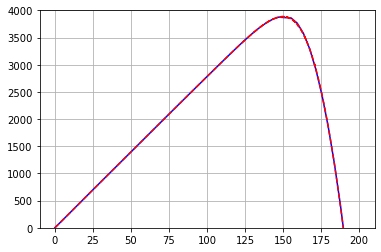

In [188]:
x = np.linspace(0, 200)
y = np.piecewise(x, [ (x <= 149.76) & (x >= 0), (x <= 200) & (x > 149.76)], [lambda x: p1_11(x), lambda x: p2_1(x)])
plt.plot(x, y, "b-")

plt.plot(df.V_pv,df.P_pv,"r--")
plt.ylim(0,4000)
plt.grid()
plt.show()

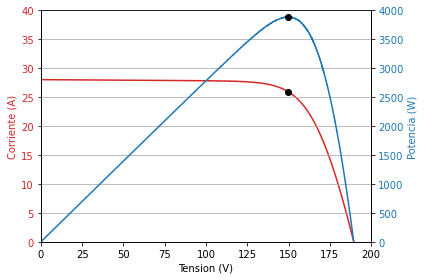

In [3]:
# Grafica Curvas caracteristicas
def curvaCaracteristica():
    global vpp, ipp, ppp
    v = df.V_pv
    i = df.I_pv
    p = df.P_pv
    vpp = pmm['V_pv']
    ipp = pmm['I_pv']
    ppp = pmm['P_pv']
    
    fig, ax1 = plt.subplots()
    
    color = "tab:red"
    ax1.set_xlabel("Tension (V)")
    ax1.set_ylabel("Corriente (A)", color=color)
    ax1.plot(v, i, color=color)
    ax1.plot(vpp, ipp, marker="o", color="black")
    ax1.tick_params(axis="y", labelcolor=color)
    ax1.set_xlim(0,200)
    ax1.set_ylim(0,40)
    ax2 = ax1.twinx() 
    
    color = "tab:blue"
    ax2.set_ylabel("Potencia (W)", color=color)  
    ax2.plot(v, p, color=color)
    ax2.plot(vpp, ppp, marker="o", color="black")
    ax2.tick_params(axis="y", labelcolor=color)
    ax2.set_xlim(0,200)
    ax2.set_ylim(0,4000)
    
    fig.tight_layout() 
    plt.grid()
  
    plt.show()

curvaCaracteristica()

In [4]:
# R cuadrado ajustado
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

In [5]:
def curvasAjuste(x,y,a,b,degree):
    #fit polynomial models 
    model = np.poly1d(np.polyfit(x,y, degree))
           
    #create scatterplot
    polyline = np.linspace(a,b, 1000)
    plt.scatter(x, y)
    
    #add fitted polynomial lines to scatterplot 
    plt.plot(polyline, model(polyline), color='green', label= f'Funcion grado {degree}')
      
    
    plt.legend()
    plt.grid()
    plt.show()

# Potencia

In [85]:
df1 = df.iloc[:149755+10*1000]
v = df1.V_pv
p = df1.P_pv
print(adjR(v, p, 5))

{'r_squared': 0.9999049853367739}


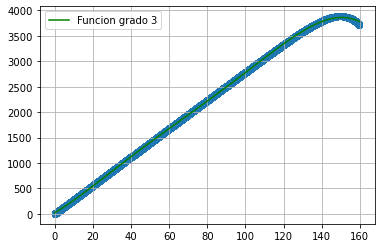

In [86]:
def curvasAjuste():
    #fit polynomial models 
    model = np.poly1d(np.polyfit(v, p, 5))
        
    #create scatterplot
    polyline = np.linspace(0, 149.76+10)
    plt.scatter(v, p)
    
    #add fitted polynomial lines to scatterplot 
    plt.plot(polyline, model(polyline), color='green', label= 'Funcion grado 3')
    
    
    plt.legend()
    plt.grid()
    plt.show()

curvasAjuste()

In [88]:
model = np.poly1d(np.polyfit(v, p, 5))
print(model)

            5             4            3          2
-1.763e-07 x + 5.828e-05 x - 0.006836 x + 0.3346 x + 21.79 x + 26.61


In [89]:
def p1(x):
    #return -0.001414*x**3 + 0.2821*x**2 + 13.16*x + 156.6
    #return -0.0007174*x**3 + 0.1341*x**2 + 21.31*x + 66.85
    return -1.763e-07*x**5 + 5.828e-05*x**4 - 0.006836*x**3 + 0.3346*x**2 + 21.79*x + 26.61

In [90]:
p1(149.76)

3868.2289011415587

In [91]:
abs(((3885.37344 - p1(149.76))/p1(149.76))*100)

0.4432141762185166

In [93]:
df2 = df.iloc[149755-30*1000:]
v = df2.V_pv
p = df2.P_pv
print(adjR(v, p, 3))

{'r_squared': 0.9995660900455904}


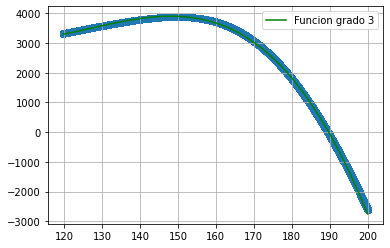

In [94]:
def curvasAjuste():
    #fit polynomial models 
    model = np.poly1d(np.polyfit(v, p, 3))
        
    #create scatterplot
    polyline = np.linspace(149.76-30,200)
    plt.scatter(v, p)
    
    #add fitted polynomial lines to scatterplot 
    plt.plot(polyline, model(polyline), color='green', label= 'Funcion grado 3')
    
    
    plt.legend()
    plt.grid()
    plt.show()

curvasAjuste()

In [95]:
model = np.poly1d(np.polyfit(v, p, 3))
print(model)

          3         2
-0.02142 x + 8.157 x - 1007 x + 4.364e+04


In [96]:
def p2(x):
    return -0.02142*x**3 + 8.157*x**2 - 1007*x + 4.364e+04
    #return -0.01926*x**3 + 7.065*x**2 - 824.4*x + 3.359e+04
    #return -0.01389*x**3 + 4.29*x**2 - 349.1*x + 6619

In [97]:
p2(149.76)

3831.294932910081

In [98]:
abs(((3885.37344 - p2(149.76))/p2(149.76))*100)

1.4114942346357842

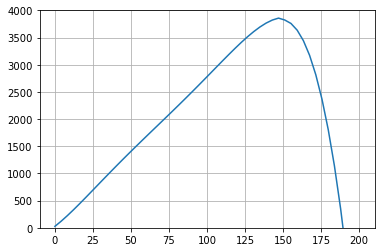

In [99]:
x = np.linspace(0, 200)
y = np.piecewise(x, [ (x <= 149.76) & (x >= 0), (x <= 200) & (x > 149.76)], [lambda x: p1(x), lambda x: p2(x)])
plt.plot(x, y)

#plt.plot(df.V_pv,df.P_pv, style='--')
plt.ylim(0,4000)
plt.grid()
plt.show()

In [130]:
print(p4(149.76))

3882.1896447999898


In [74]:
model5 = np.poly1d(np.polyfit(df1.V_pv, df1.P_pv, 5))
print(model5)

            5            4            3         2
-9.217e-08 x + 2.86e-05 x - 0.003153 x + 0.144 x + 25.49 x + 10.19


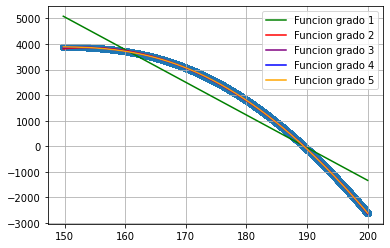

In [66]:
df1 = df.iloc[149755:]
def curvasAjuste():
    #fit polynomial models up to degree 5
    model1 = np.poly1d(np.polyfit(df1.V_pv, df1.P_pv, 1))
    model2 = np.poly1d(np.polyfit(df1.V_pv, df1.P_pv, 2))
    model3 = np.poly1d(np.polyfit(df1.V_pv, df1.P_pv, 3))
    model4 = np.poly1d(np.polyfit(df1.V_pv, df1.P_pv, 4))
    model5 = np.poly1d(np.polyfit(df1.V_pv, df1.P_pv, 5))
    
    
    #create scatterplot
    polyline = np.linspace(149.76, 200, 1000)
    plt.scatter(df1.V_pv, df1.P_pv)
    
    #add fitted polynomial lines to scatterplot 
    plt.plot(polyline, model1(polyline), color='green', label= 'Funcion grado 1')
    plt.plot(polyline, model2(polyline), color='red', label= 'Funcion grado 2')
    plt.plot(polyline, model3(polyline), color='purple', label= 'Funcion grado 3')
    plt.plot(polyline, model4(polyline), color='blue', label= 'Funcion grado 4')
    plt.plot(polyline, model5(polyline), color='orange', label= 'Funcion grado 5')
    
    plt.legend()
    plt.grid()
    #plt.savefig("./imagenes/curvaajuste.png")
    plt.show()

curvasAjuste()

In [67]:
model5 = np.poly1d(np.polyfit(df1.V_pv, df1.P_pv, 5))
print(model5)

            5            4         3         2
-4.235e-06 x + 0.004116 x - 1.587 x + 300.6 x - 2.789e+04 x + 1.019e+06


In [69]:
def p1(x):
    return -9.217e-08*x**5 + 2.86e-05*x**4 - 0.003153*x**3 + 0.144*x**2 + 25.49*x + 10.19
def p2(x):
    return -4.235e-06*x**5 + 0.004116*x**4 - 1.587*x**3 + 300.6*x**2 - 2.789e+04*x + 1.019e+06

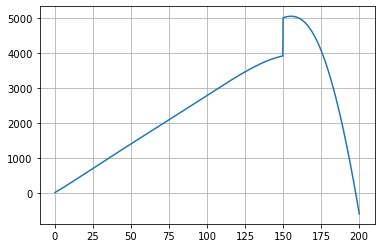

In [75]:
x = np.linspace(0, 200, 1000)
y = np.piecewise(x, [ (x <= 149.76) & (x >= 0), (x <= 200) & (x > 149.76)], [lambda x: p1(x), lambda x: p2(x)])
plt.plot(x, y)
#plt.plot(df.V_pv,df.I_pv)
plt.grid()
plt.show()

# Modelo I(v)

## Trozo 1

In [8]:
df1 = df.iloc[:100*1000]
v = df1.V_pv
i = df1.I_pv
print(adjR(v, i, 1))
print(adjR(v, i, 2))

{'r_squared': 0.999061975995626}
{'r_squared': 0.9996410186558825}


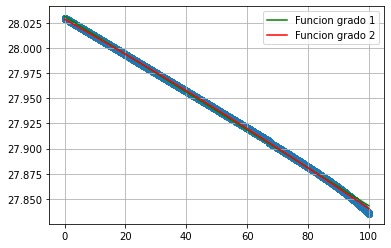

In [9]:
def curvasAjuste():
    #fit polynomial models 
    model1 = np.poly1d(np.polyfit(df1.V_pv, df1.I_pv, 1))
    model2 = np.poly1d(np.polyfit(df1.V_pv, df1.I_pv, 2))
        
    #create scatterplot
    polyline = np.linspace(0, 100, 1000)
    plt.scatter(df1.V_pv, df1.I_pv)
    
    #add fitted polynomial lines to scatterplot 
    plt.plot(polyline, model1(polyline), color='green', label= 'Funcion grado 1')
    plt.plot(polyline, model2(polyline), color='red', label= 'Funcion grado 2')
    
    
    plt.legend()
    plt.grid()
    plt.show()

curvasAjuste()

In [10]:
model1 = np.poly1d(np.polyfit(df1.V_pv, df1.I_pv, 1))
print(model1)

 
-0.001884 x + 28.03


In [11]:
def f1(x):
    return -0.001884*x + 28.03

## Trozo 2

In [14]:
df2 = df.iloc[100*1000:125*1000]
v = df2.V_pv
i = df2.I_pv
print(adjR(v, i, 2))
print(adjR(v, i, 3))

{'r_squared': 0.9976003472922175}
{'r_squared': 0.9999091579549512}


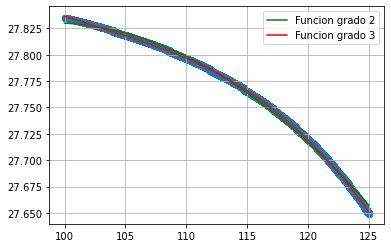

In [20]:
def curvasAjuste():
    #fit polynomial models 
    model1 = np.poly1d(np.polyfit(df2.V_pv, df2.I_pv, 2))
    model2 = np.poly1d(np.polyfit(df2.V_pv, df2.I_pv, 3))
        
    #create scatterplot
    polyline = np.linspace(100, 125,1000)
    plt.scatter(df2.V_pv, df2.I_pv)
    
    #add fitted polynomial lines to scatterplot 
    plt.plot(polyline, model1(polyline), color='green', label= 'Funcion grado 2')
    plt.plot(polyline, model2(polyline), color='red', label= 'Funcion grado 3')
    
    
    plt.legend()
    plt.grid()
    plt.show()

curvasAjuste()

In [21]:
model2 = np.poly1d(np.polyfit(df2.V_pv, df2.I_pv, 3))
print(model2)

            3            2
-8.342e-06 x + 0.002565 x - 0.2665 x + 37.18


In [22]:
def f2(x):
    return -8.342e-06*x**3 + 0.002565*x**2 - 0.2665*x + 37.18

## Trozo 3

In [23]:
df3 = df.iloc[125*1000:175*1000]
v = df3.V_pv
i = df3.I_pv
print(adjR(v, i, 2))
print(adjR(v, i, 3))

{'r_squared': 0.9920242332566584}
{'r_squared': 0.9999731571540963}


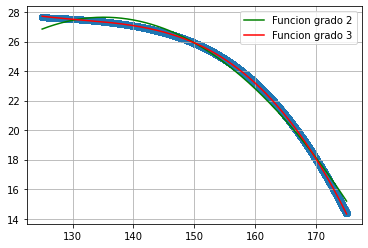

In [24]:
def curvasAjuste():
    #fit polynomial models 
    model1 = np.poly1d(np.polyfit(df3.V_pv, df3.I_pv, 2))
    model2 = np.poly1d(np.polyfit(df3.V_pv, df3.I_pv, 3))
        
    #create scatterplot
    polyline = np.linspace(125, 175,1000)
    plt.scatter(df3.V_pv, df3.I_pv)
    
    #add fitted polynomial lines to scatterplot 
    plt.plot(polyline, model1(polyline), color='green', label= 'Funcion grado 2')
    plt.plot(polyline, model2(polyline), color='red', label= 'Funcion grado 3')
    
    
    plt.legend()
    plt.grid()
    plt.show()

curvasAjuste()

In [25]:
model3 = np.poly1d(np.polyfit(df3.V_pv, df3.I_pv, 3))
print(model3)

           3           2
-0.000139 x + 0.05472 x - 7.214 x + 346


In [26]:
def f3(x):
    return -0.000139*x**3 + 0.05472*x**2 - 7.214*x + 346

## Trozo 4

In [28]:
df4 = df.iloc[175*1000:200*1000]
v = df4.V_pv
i = df4.I_pv
print(adjR(v, i, 1))
print(adjR(v, i, 2))

{'r_squared': 0.9963844387102881}
{'r_squared': 0.9999843366874855}


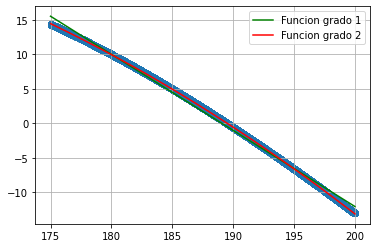

In [30]:
def curvasAjuste():
    #fit polynomial models 
    model1 = np.poly1d(np.polyfit(df4.V_pv, df4.I_pv, 1))
    model2 = np.poly1d(np.polyfit(df4.V_pv, df4.I_pv, 2))
        
    #create scatterplot
    polyline = np.linspace(175, 200,1000)
    plt.scatter(df4.V_pv, df4.I_pv)
    
    #add fitted polynomial lines to scatterplot 
    plt.plot(polyline, model1(polyline), color='green', label= 'Funcion grado 1')
    plt.plot(polyline, model2(polyline), color='red', label= 'Funcion grado 2')
    
    
    plt.legend()
    plt.grid()
    plt.show()

curvasAjuste()

In [31]:
model4 = np.poly1d(np.polyfit(df4.V_pv, df4.I_pv, 2))
print(model4)

          2
-0.01028 x + 2.751 x - 152.2


In [33]:
def f4(x):
    return -0.01028*x**2 + 2.751*x - 152.2

## Modelo i(v)

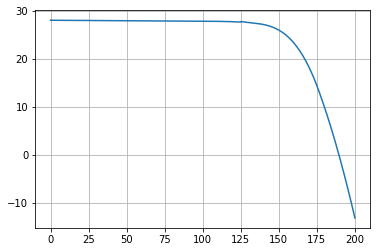

In [34]:
x = np.linspace(0, 200, 1000)
y = np.piecewise(x, [ (x <= 100) & (x >= 0), (x <= 125) & (x > 100),(x <= 175) & (x > 125), (x <= 200) & (x > 175)], [lambda x: f1(x), lambda x: f2(x),
lambda x: f3(x), lambda x: f4(x)])
plt.plot(x, y)
#plt.plot(df.V_pv,df.I_pv)
plt.grid()
plt.show()

In [36]:
def p3(x):
    return (-0.000139*x**3 + 0.05472*x**2 - 7.214*x + 346)*x
print("La tension del modelo en su PMM es: ", f3(149.76))
print("La maxima potencia es : ", p3(149.76))

La tension del modelo en su PMM es:  26.017870913535944
La maxima potencia es :  3896.436348011143


# Modelo Potencia

In [41]:
df1 = df.iloc[:100*1000]
v = df1.V_pv
p = df1.P_pv
print(adjR(v, p, 1))
print(adjR(v, p, 2))

{'r_squared': 0.9999965398479903}
{'r_squared': 0.9999999830440476}


In [43]:
model1 = np.poly1d(np.polyfit(df1.V_pv, df1.P_pv, 2))
print(model1)

           2
-0.002001 x + 28.04 x - 0.1362


In [ ]:
def p1(x):
    return -0.001884*x + 28.03